# Analysis of dataset medical costs of people characterized by certain attributes

● Exploratory Data Analysis ● Hypothesis testing

Read the dataset using Pandas
Read the dataset with file name 'insurance.csv' into a dataframe with name ins.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_ind_from_stats
import scipy.stats as stats  
from sklearn import preprocessing


In [2]:
ins=pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  QUESTION 1
### Shape of data.
Finding the shape of dataset.

In [3]:
print(ins.shape)


(1338, 7)


##  QUESTION 2 

### Data types of each attributes

Printing the data types of each attribute.


In [4]:
ins.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## QUESTION 3 

### Checking the presence of missing values.

Checking the presence of issing values for null values.

In [5]:
print(ins.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### checking the presence of missing values for NA values.


In [6]:
print(ins.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## QUESTION 4
### 5 Point summary of numerical attributes
Printing 5 point summary of numerical attributes **Age,BMI,Children, Charges**.

In [7]:
ins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## QUESTION 5
### Distribution of 'BMI', 'age, 'chargers ' columns

**Displaying Distributoin plot for attributes 'Ages'


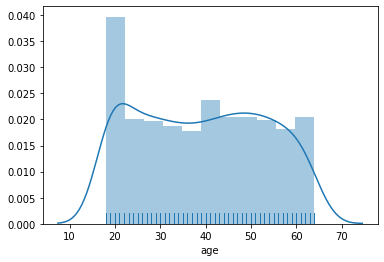

In [8]:
sns.distplot(ins.age,hist=True, kde=True , rug =True, label ='Distribution of Ages')

### Displaying Distribution plot for attributes 'BMI'


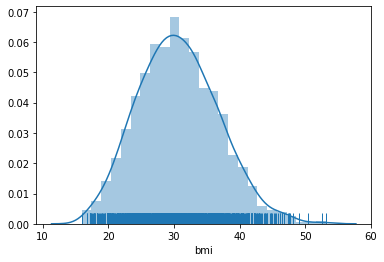

In [9]:
sns.distplot(ins.bmi,hist=True,kde=True,rug=True,label='Distribution for BMI column');

### Displaying Distribution plot for attributes 'Charges'

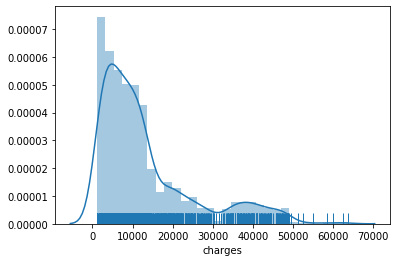

In [10]:
sns.distplot(ins.charges,hist=True,kde=True,rug=True,label='Distribution for Charges column');

## QUSTION 6

### Measure of skewness of ‘BMI’, ‘Age’ and ‘Charges’ columns
#### Printing Skewness for ‘BMI’, ‘Age’ and ‘Charges

In [11]:
ins.skew(axis=0, skipna=None, level=None, numeric_only=None)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

## Question 7
### Checking the presence of outliers in ‘BMI’, ‘Age’ and ‘Charges' columns using BoxPlot
 

### Displaying Box plot for attributes 'BMI' to check presence of outliers

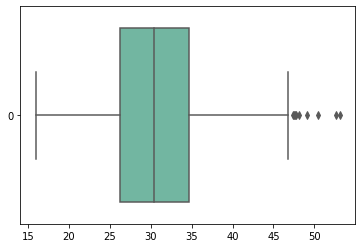

In [12]:
sns.boxplot(data=ins.bmi, orient="h", palette="Set2");

### Displaying **Box plot** for attributes **'Age'** to check presence of outliers 

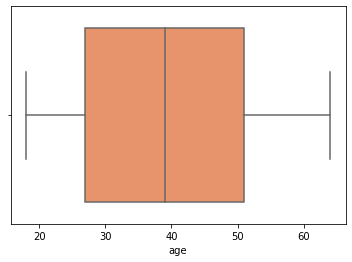

In [13]:
sns.boxplot( x=ins["age"], palette="OrRd");

### Displaying **Box plot** for attributes **'Charges'** to check presence of outliers 

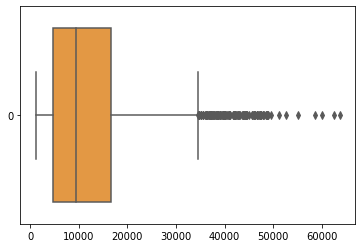

In [14]:
sns.boxplot(data=ins.charges, orient="h", palette="YlOrBr_r");

## Question 8
### Distribution of categorical columns (including children) 

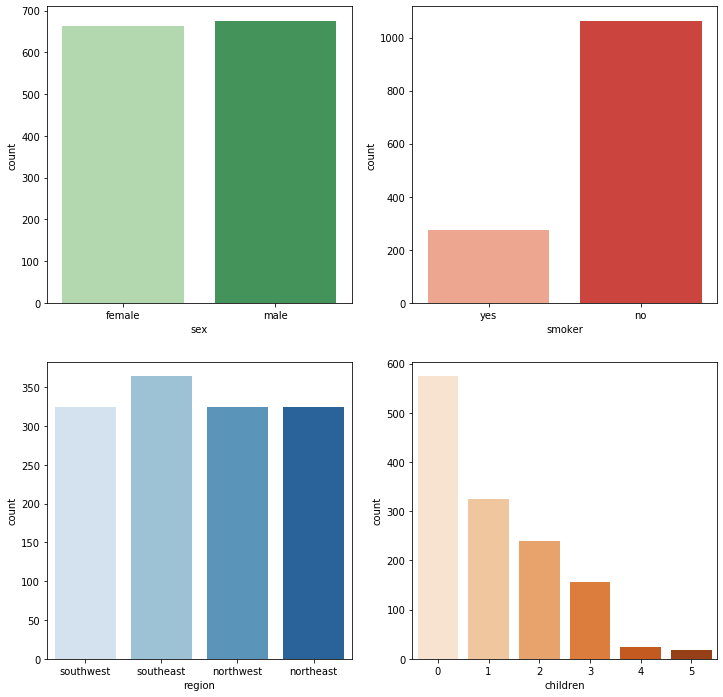

In [15]:
fig, axs = plt.subplots(figsize=(12,12), ncols=2, nrows=2)
sns.countplot(ins['sex'], ax=axs[0,0],alpha = 1,palette="Greens")
sns.countplot(ins['smoker'],ax=axs[0,1],alpha = 1,palette="Reds")
sns.countplot(ins['region'],ax=axs[1,0],alpha = 1,palette="Blues")
sns.countplot(ins['children'], ax=axs[1,1],alpha = 1,palette = 'Oranges');

## Question 9
### Pair plot that includes all the columns of the dataframe
 
#### For pair plot we need our data coloumns in int or float type hence converting required coloumns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


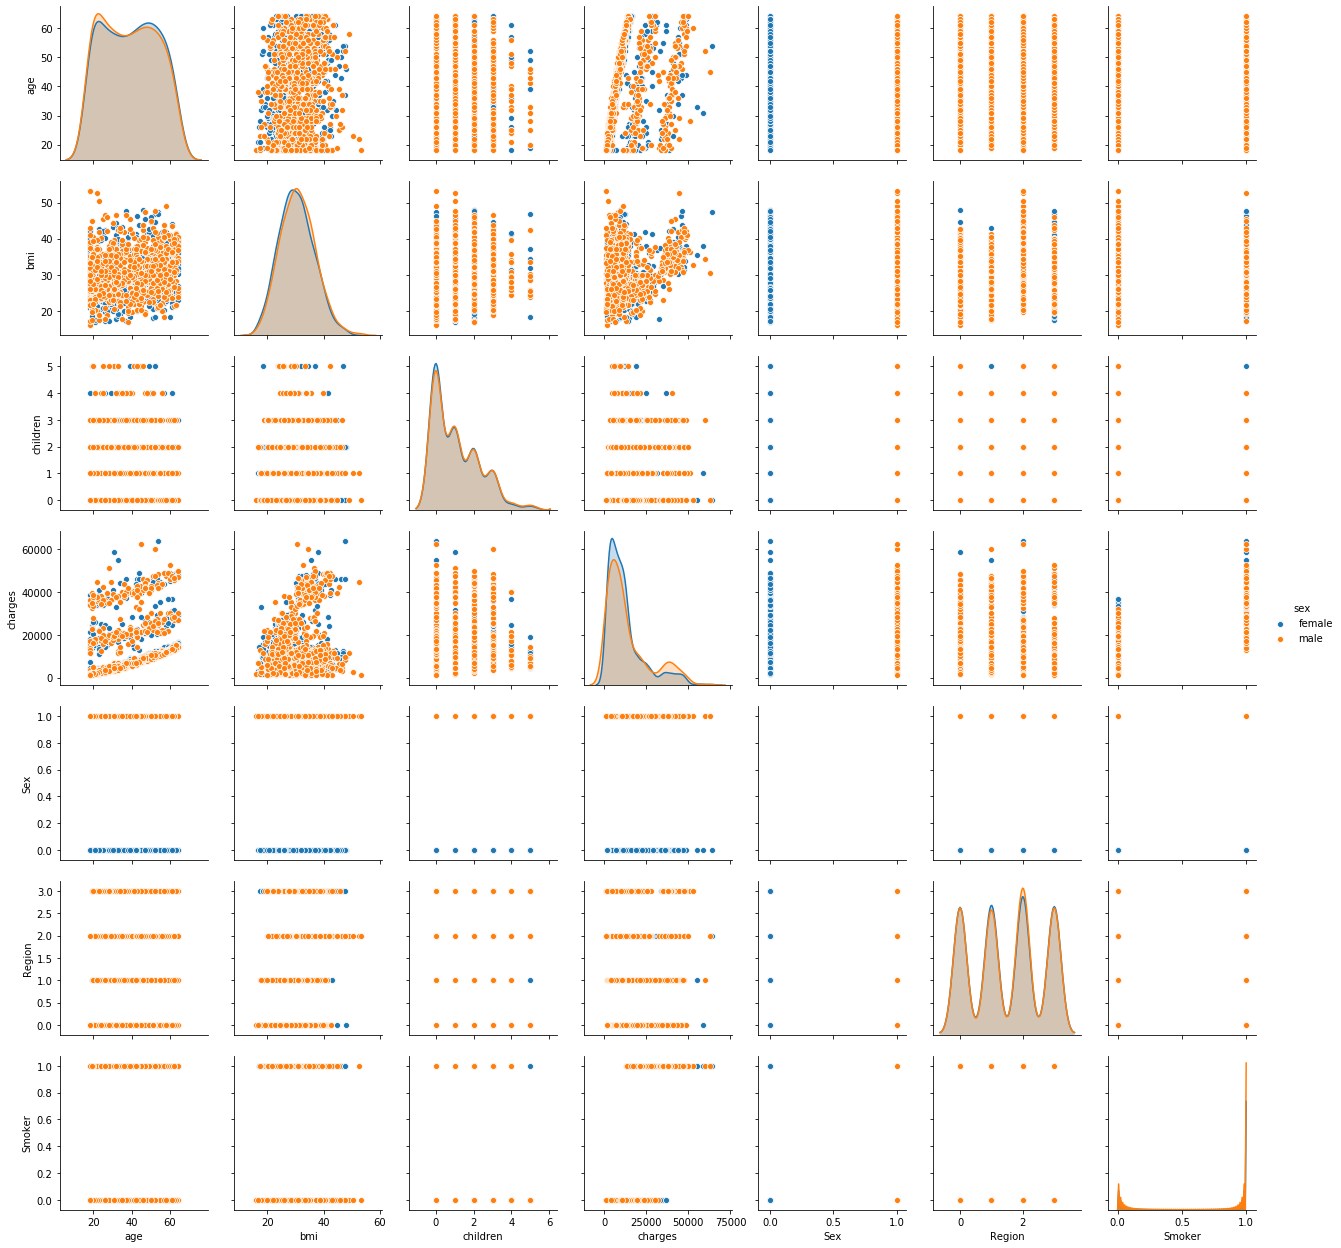

In [16]:
le = preprocessing.LabelEncoder() 
ins['Sex']= le.fit_transform(ins['sex']).astype(int)
ins['Region']= le.fit_transform(ins['region']).astype(int)
ins['Smoker']= le.fit_transform(ins['smoker']).astype(int)
sns.pairplot(data = ins,hue = 'sex');

## Answer the following questions with statistical evidence

## Question 10

### Do charges of people who smoke differ significantly from the people who don't?

### Step 1: Define null and alternative hypotheses

<b>Null Hypothesis $H_O$ </b>= Healtcare Charges of people who smoke does not differ significantly from the people who don't

<b>Alternate Hypothesis $H_A$ </b> = Healtcare Charges of people who smoke differ significantly from the people who don't

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and population standard deviation is not known.

### Step 3: Calculate the p - value and test statistic

In [17]:
sm_yes = ins[ins.smoker == 'yes']['charges']
sm_no = ins[ins.smoker == 'no']['charges']

In [18]:
t_statistic, p_value  =  stats.ttest_ind(sm_yes,sm_no)
print(t_statistic,p_value)

46.664921172723716 8.271435842177219e-283


In this example, p value is 8.271435842177219e-283 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So, we conclude that there is a significant difference in charges of people who smoke from the people who don't

## Question 11

### Does bmi of males differ significantly from that of females?

### Step 1: Define null and alternative hypotheses

<b>Null Hypothesis $H_O$ </b>= bmi of males doesn't differ significantly from that of females

<b>Alternate Hypothesis $H_A$ </b> = bmi of males differ significantly from that of females

## Question 11

### Does bmi of males differ significantly from that of females?

### Step 1: Define null and alternative hypotheses

<b>Null Hypothesis $H_O$ </b>= bmi of males doesn't differ significantly from that of females

<b>Alternate Hypothesis $H_A$ </b> = bmi of males differ significantly from that of females

Here we select $\alpha$ = 0.05 and population standard deviation is not known.

### Step 3: Calculate the p - value and test statistic

In [19]:
bmi_male = ins[ins.sex == 'male']['bmi']
bmi_female = ins[ins.sex == 'female']['bmi']
t_stats, p_val  =  stats.ttest_ind(bmi_male,bmi_female)
print(p_val)

0.08997637178984932


In this example, p value is 0.08997637178984932 and it is greater than 5% level of significance

So the statistical decision is fail to reject the null hypothesis at 5% level of significance.

### So, we conclude that there is no significant difference in bmi of males and females

## Question 12
### To check whether proportion of smokers significantly different in different genders?
 
#### We need to first check equality of variance test to perform Anova test on sample 

In [20]:
smoker_male = ins[(ins['sex'] == 'male') & (ins['smoker'] == 'yes')]['sex']
smoker_female = ins[(ins['sex'] == 'female') & (ins['smoker'] == 'yes')]['sex']

cont = pd.crosstab(ins['smoker'], ins['sex'])

print('cont')
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(cont)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

cont
Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1


###### In this example, p value is 0.006548 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in proportion of smokers in different genders

## Question 13
### To check whether distribution of bmi across women with no children, one child and two children, the same ?
 
#### We need to first check equality of variance test to perform Anova test on sample 

In [21]:
female_child_0 = ins[(ins['sex'] == 'female') & (ins['children'] == 0)]['bmi']
female_child_1 = ins[(ins['sex'] == 'female') & (ins['children'] == 1)]['bmi']
female_child_2 = ins[(ins['sex'] == 'female') & (ins['children'] == 2)]['bmi']

Levene_stats, Levene_P = stats.levene(female_child_0,female_child_1,female_child_2)
print(Levene_P)

0.3899432394522804


#### As p value is higher than .05, we cant reject null Hypothesis which means that the female_child_0,female_child_1,female_child_2 pass equality of variance test. So, we can perform ANOVA test.

In [22]:
anv_stats, anv_p = stats.f_oneway(female_child_0,female_child_1,female_child_2)
print(anv_p)

0.7158579926754841


#### As p value is higher than .05, we failed to reject NULL Hypothesis, hence we can claim with high confidence that the means of the results of all three experiments are not significantly different.